# Using Batch Gradient Descent to Optimize Cubic Polynomials

In [359]:
def eval_poly(coeffs, x):
    """
    Function to calculate the y-value of a cubic polynomial
    
    Args: 
        coeffs: 4-list containing the a,b,c,d coefficients 
        x: x-value to evaluate for function
    
    Returns: 
        y: the corresponding y-value for the cubic polynomial with given x
    
    """
    a = coeffs[0] * x**3
    b = coeffs[1] * x**2
    c = coeffs[2] * x**1
    d = coeffs[3]
    
    y = a + b + c + d
    return y

In [360]:
import numpy as np
import matplotlib.pyplot as plt
import random

num_xs = 500
j = 200 # Noise
iterations = 400
best_lr = 0.000001 # Do not change this
xs_lst = np.random.uniform(-10,10,num_xs) # Get 100 random x values between (-10,10) (integers)

## Getting graph for original data

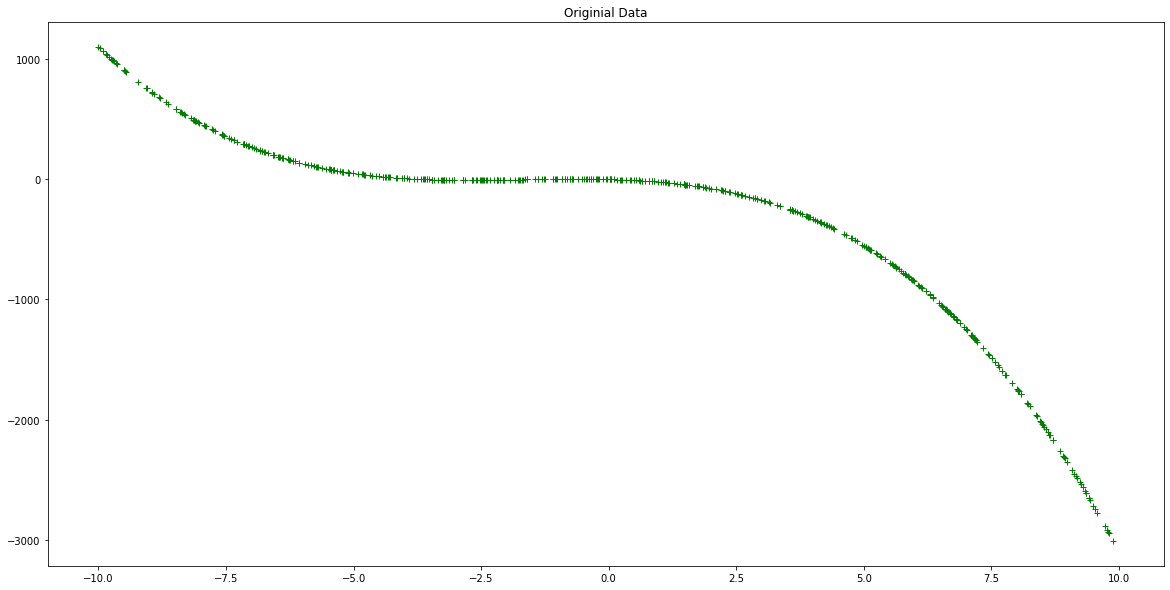

In [361]:
# Coefficientss for cubic polynomial
coeffs = [random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10)] 

xs = [] # List for xs
ys = [] # List for ys

for x in xs_lst: # Iterate over each x-value
    xs.append(x) # Append x to list
    
    y = eval_poly(coeffs, x) # Evaluate y for x
    ys.append(y) # Append y to lsit
    
plt.figure(figsize=(20,10)) # Plot size
plt.plot(xs,ys,'g+') # Plot details
plt.title('Originial Data') # Title of plot
plt.show()

## Getting graph with noise added to data

In [362]:
def eval_poly_noise(coeffs, x, j):
    """
    Function for evaluating y values of inputted x, with noise added
    for a more realistic graph
        
    args:
        coeffs: 4-list of a,b,c,d coefficients for cubic polynomial
        x: inputted x-value to be evaluated
        j: the amount of noise
        
    return:
        noise_y: y-value from evaluating cubic polynomial with noise added
        
    """
    
    a = coeffs[0] * x**3
    b = coeffs[1] * x**2
    c = coeffs[2] * x**1
    d = coeffs[3]

    y = a + b + c + d # Evaluated y value
    
    random_noise_factor = (-1)**(random.randint(1,1000)) * random.random() * j
    
    noise_y = random_noise_factor + y
    
    return noise_y

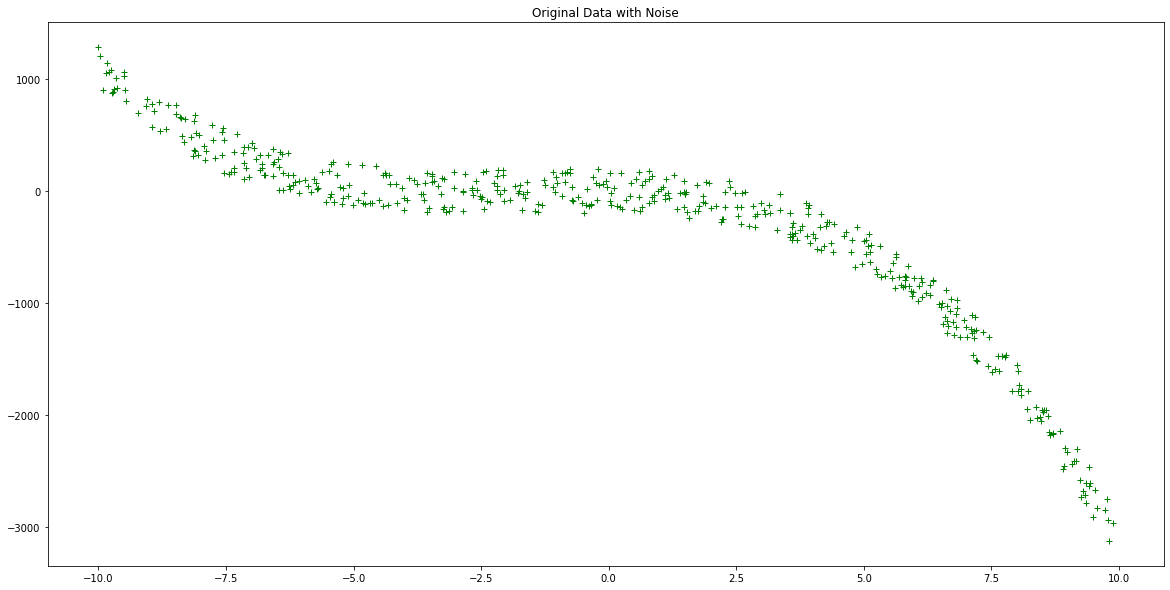

In [363]:
xs = [] # List for xs
ys = [] # List for ys

for x in xs_lst: # Iterate over each x
    xs.append(x) # Append x to list xs
    
    y = eval_poly_noise(coeffs, x, j) # Evaluate x with noise
    ys.append(y) # Append y to list ys
    
plt.figure(figsize=(20,10)) # Size of plot
plt.plot(xs,ys,'g+') # Plot details
plt.title('Original Data with Noise') # Title of plot
plt.show()

### Now we try to evaluate the coefficients we chose, but with random starting coefficients. First let's get the x and y values of our random starting coefficients.

In [364]:
rand_coeffs = (random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10),random.randrange(-10,10))
rand_coeffs

(-8, -5, 0, 5)

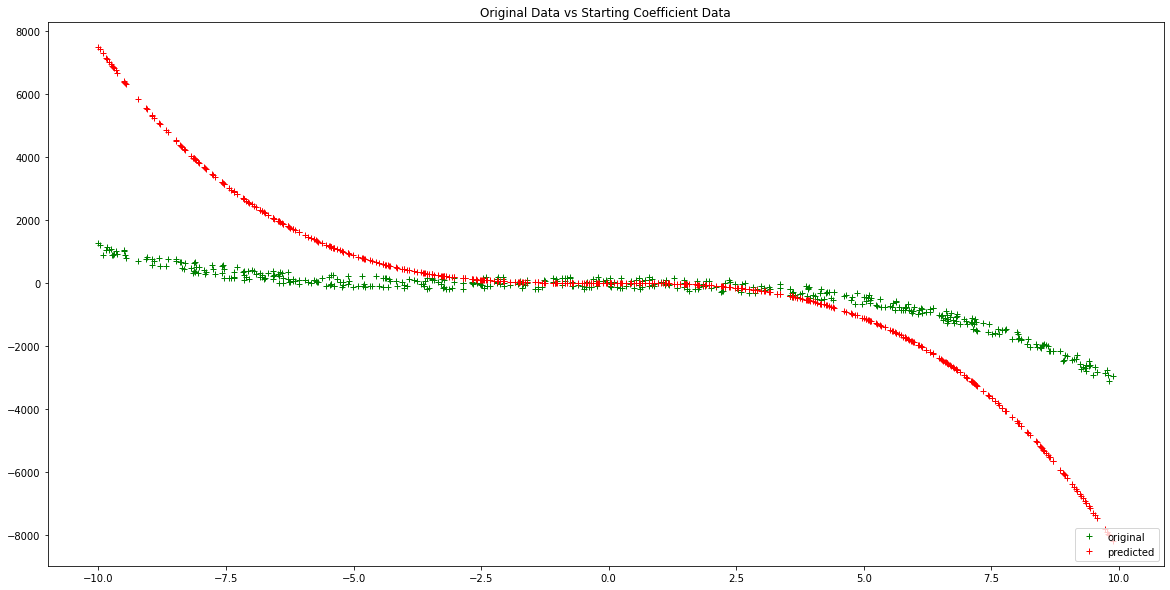

In [365]:
y_bar = eval_poly(rand_coeffs,xs_lst)

plt.figure(figsize=(20,10))
plt.plot(xs,ys,'g+', label='original')
plt.plot(xs,y_bar,'r+', label='predicted')
plt.title('Original Data vs Starting Coefficient Data')
plt.legend(loc='lower right')
plt.show()

## Calculate the Mean Squared Error Loss

In [366]:
def mse(ys,y_bar):
    """
    Function for evaluating the mean squared error loss 
    
    args: 
        ys: List of actual y values
        y_bar: List of predicted y values
        
    return:
        mse: The mean squared error value
        
    """
    
    return sum( (ys-y_bar)**2 ) / len(ys)

initial_model_loss = mse(ys,y_bar)
initial_model_loss

4389877.21314785

### Use Gradient Descent to minimize loss

In [367]:
def gd_for_poly(coeffs,input_xs,real_ys,lr):
    """
    Function to calculate new coefficients (closer to real coeff)
    
    args:
        coeffs: The random starting coefficients
        xs: List of hundred random x
        ys: y value with noise, evaluted from xs
        lr: learning rate
    
    """
    
    a_s = [] # List to hold sum part of gradient of MSE with respect to coefficient a
    b_s = [] # List to hold sum part of gradient of MSE with respect to coefficient b
    c_s = [] # List to hold sum part of gradient of MSE with respect to coefficient c
    d_s = [] # List to hold sum part of gradient of MSE with respect to coefficient d
    
    y_bars = eval_poly(coeffs, input_xs) # y values starting from random-starting-coefficients
    
    for x,y,y_bar in list(zip(input_xs,real_ys,y_bars)): # Iterate over each xs, ys, y_bar
        
        x_cubed = x**3 # x cubed
        x_squared = x**2 # x squared      
        
        partial_a = x_cubed * (y - y_bar) # Sum part for gradient of coefficient a
        a_s.append(partial_a)
        
        partial_b = x_squared * (y - y_bar) # Sum part for gradient of coefficient b
        b_s.append(partial_b)
        
        partial_c = x * (y - y_bar) # Sum part for gradient of coefficient c
        c_s.append(partial_c)
        
        partial_d = (y - y_bar) # Sum part for gradient of coefficient d
        d_s.append(partial_d)
        

    n = len(y_bars) # Length of list xs
        
    gradient_a = (-2/n) * sum(a_s) # Gradient of MSE with respect to a
    gradient_b = (-2/n) * sum(b_s) # Gradient of MSE with respect to b
    gradient_c = (-2/n) * sum(c_s) # Gradient of MSE with respect to c
    gradient_d = (-2/n) * sum(d_s) # Gradient of MSE with respect to d
    
    a_new = coeffs[0] - gradient_a * lr # New coefficient a value
    b_new = coeffs[1] - gradient_b * lr # New coefficient b value
    c_new = coeffs[2] - gradient_c * lr # New coefficient c value
    d_new = coeffs[3] - gradient_d * lr # New coefficient d value
    
    new_model_coeffs = (a_new,b_new,c_new,d_new) # New coefficients
    
    new_y_bar = eval_poly(new_model_coeffs, input_xs) # New list of predict y values
    
    new_model_loss = mse(ys, new_y_bar) # New MSE loss
    
    return new_model_coeffs, new_y_bar, new_model_loss

In [368]:
def gradient_descent(n,lr):
    """
    Perform gradient descent for cubic polynomial n times
    
    args:
        n: Number of iterations
        lr: Learning rate
        
    return:
        Tuple containing latest coeffs, predicted y values, MSE loss, and a list of all MSE loss.
        
    """
    
    losses = [] # List to hold all MSE loss values (for graph later)
    rand_coeffs_to_test = rand_coeffs # Variable for rand_coeffs
    
    for i in range(n):
        loss = gd_for_poly(rand_coeffs_to_test, xs_lst, ys, lr)
        
        rand_coeffs_to_test = loss[0] # Update coefficients
        
        losses.append(loss[2]) # Append MSE loss to list losses
        
    final_coeffs = loss[0]
    final_y_bar = loss[1]
    final_loss = loss[2]
    return final_coeffs, final_y_bar, final_loss, losses

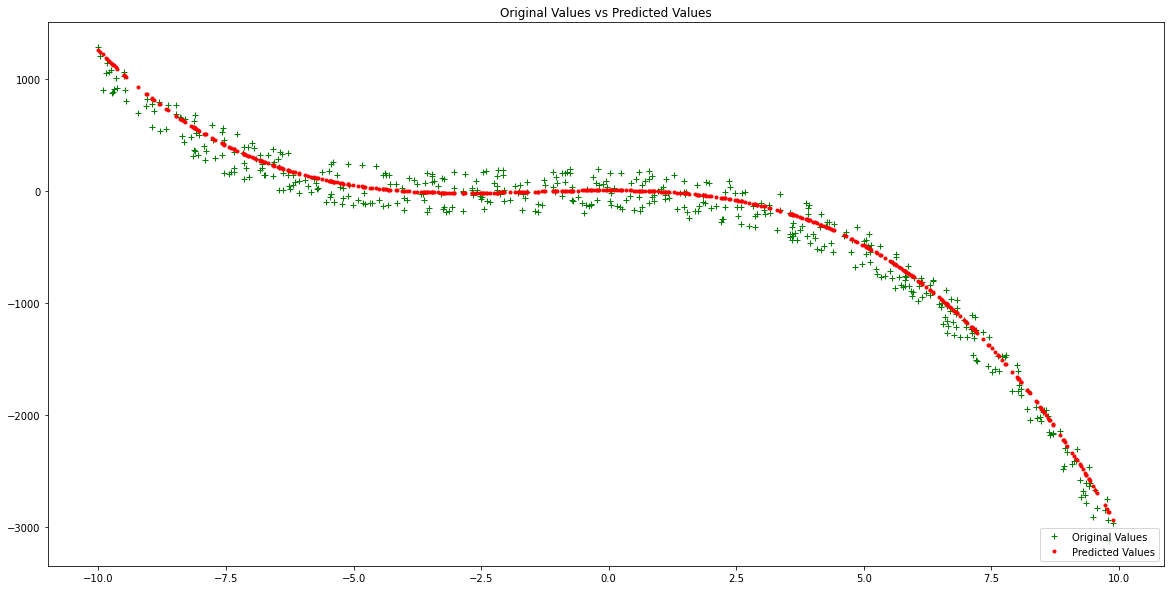

Final Predicted Coefficients: (-2.1447953245923306, -8.943346075799239, 0.04928822270024281, 4.9276060989982176).
Original Coefficients: [-2, -10, -10, -3].
MSE Loss: 15548.33408072989.
Percentage of original error: 0.35419%.


In [369]:
gd = gradient_descent(iterations,best_lr)

plt.figure(figsize=(20,10))
plt.plot(xs,ys,'g+', label='Original Values')
plt.plot(xs,gd[1],'r.', label='Predicted Values')
plt.title('Original Values vs Predicted Values')
plt.legend(loc='lower right')
plt.show()

print(f"Final Predicted Coefficients: {gd[0]}.")
print(f"Original Coefficients: {coeffs}.")
print(f"MSE Loss: {gd[2]}.")
print(f"Percentage of original error: {round(gd[2]/initial_model_loss*100,5)}%.")

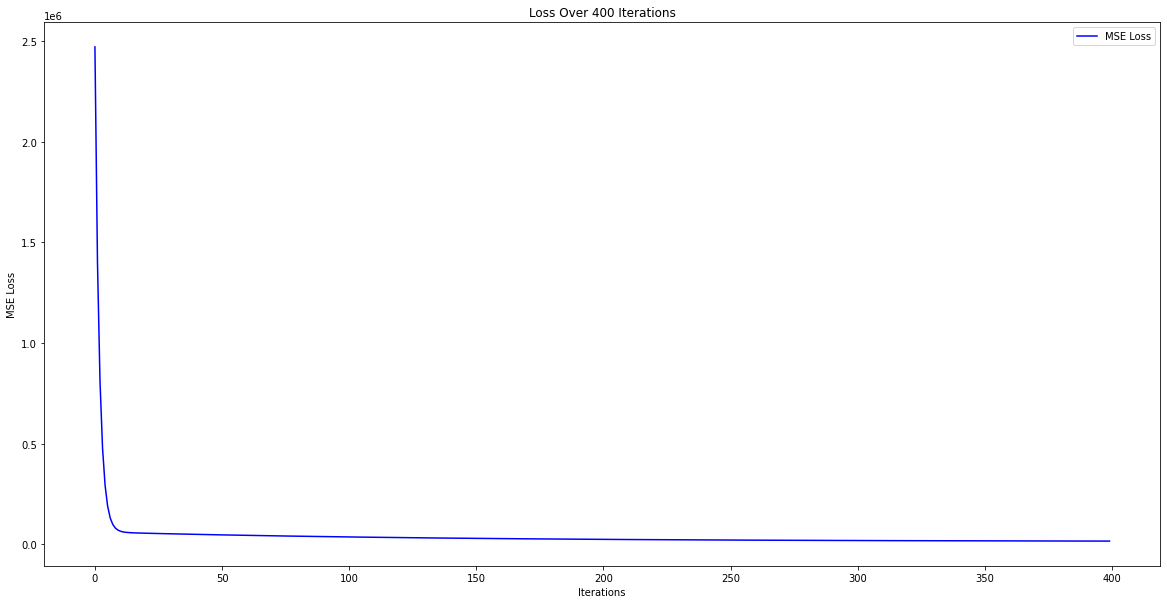

In [370]:
# Plotting loss graph
plt.figure(figsize=(20,10))
plt.plot(gd[3],'b-',label="MSE Loss")
plt.title(f'Loss Over {iterations} Iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.legend(loc='upper right')
plt.show()